# `multipagetiff` example

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from matplotlib import pyplot as plt
import multipagetiff as tiff

## Open a multipage TIFF image

In [3]:
st = tiff.Stack('Stack.tiff', dx=1, dz=1, z_label='depth', z_units='mm')

print("the stack has {} pages".format(len(st))) # number of frames

the stack has 3 pages


## plot a stack

Plot page by page. The Stack object behaves like a list, which elements are the frames

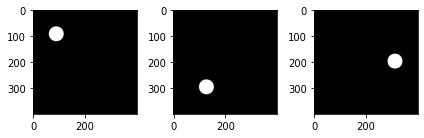

In [4]:
plt.subplot(1,3,1)
plt.imshow(st[0], cmap='gray')
plt.subplot(1,3,2)
plt.imshow(st[1], cmap='gray')
plt.subplot(1,3,3)
plt.imshow(st[2], cmap='gray')
plt.tight_layout()

Display the frame of the stack with the plot_frames function

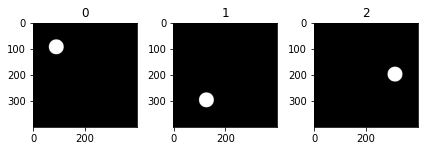

In [5]:
tiff.plot_frames(st, cmap='gray')

## color code

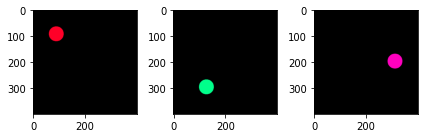

In [6]:
cc = tiff.color_code(st)

plt.subplot(1,3,1)
plt.imshow(cc[0])
plt.subplot(1,3,2)
plt.imshow(cc[1])
plt.subplot(1,3,3)
plt.imshow(cc[2])
plt.tight_layout()

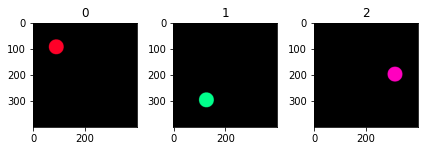

In [7]:
tiff.plot_frames(st, colorcoded=True)

## max projection

Create a color coded RGB image representing frame-depth. The image is the max projection of the color coded stack.

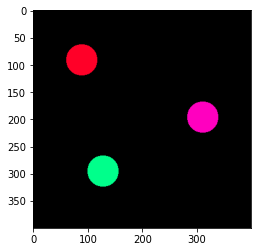

In [8]:
mp = tiff.flatten(st)
plt.imshow(mp)

plot the max projection, together with its colorbar

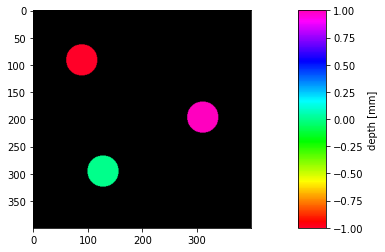

In [9]:
tiff.plot_flatten(st)

## change colormap

Use a matplotlib preset colormap

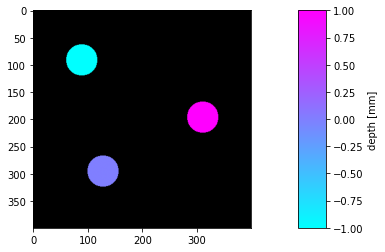

In [10]:
tiff.set_cmap(plt.cm.cool)
tiff.plot_flatten(st)

or define you own colormap

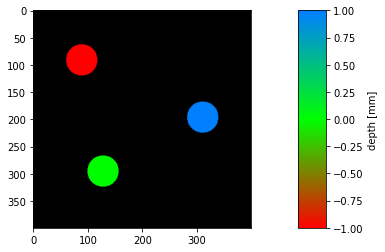

In [11]:
from matplotlib.colors import LinearSegmentedColormap

my_colors = [(1,0,0),(0,1,0),(0.0,0.5,1)]
my_cmap = LinearSegmentedColormap.from_list("myCmap", my_colors, N=256)
tiff.set_cmap(my_cmap)
tiff.plot_flatten(st)